## Caso de Estudio: Precio de Casas de Boston

El conjunto de Casas de Boston es un conjunto de datos ampliamente utilizado para la comparción de diversos algoritmos predictivos. Los datos fueron originalmente publicados por Harrison, D. and Rubinfeld, D.L. "Hedonic prices and the demand for clean air", J. Environ. Economics & Management, vol.5, 81-102, 1978 [[1](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)].

Las tareas principales por las cuales se ha utilizado este conjunto de datos son la predicción de los niveles de óxido nitroso y del precio de las casas.

El objetivo de este **Caso de Estudio** es realizar una exploración de los datos de las Casas de Bostón.

## Características Generales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#DataFrame
boston_data = pd.read_csv("./data/boston.csv")
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 1. Obtenga el número de registros y características en el conjunto de datos.

In [19]:
#Registros 
boston_shape = boston_data.shape
print ("No. de Registros: ", boston_shape[0])

print("\n", boston_data.info)

No. de Registros:  506

 <bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98  

### 2. Imprima el nombre de las columnas.
Revise el siguiente enlace ([link](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)) para conocer a qué hace referencia cada variable.

In [20]:
#Columnas
boston_data_columns = boston_data.columns

print ("Columnas:")
for column in boston_data_columns:
    print(" ",column)

Columnas:
  CRIM
  ZN
  INDUS
  CHAS
  NOX
  RM
  AGE
  DIS
  RAD
  TAX
  PTRATIO
  B
  LSTAT
  PRICE


### 3. Verifique la duplicidad y los valores faltantes del conjunto de datos.

In [22]:
#Duplicidad
boston_duplicados = boston_data.duplicated().sum()
print("Número de registros duplicados: ", boston_duplicados)

#Valores faltantes
boston_faltantes = boston_data.isnull().sum()

print("\nNúmero de valores faltantes: ")
print(boston_faltantes)

Número de registros duplicados:  0

Número de valores faltantes: 
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


## Análisis Univariado

En este ejercicio nos centraremos únicamente en la variable ```PRICE```. Seleccione esta columna y obtenga lo que se pide a continuación.

### 4. Obtenga el valor mínimo, máximo, promedio, mediana y desviación estándar del precio de las casas.

In [23]:
boston_descr = boston_data.describe().T

print("Precio de las casas: ")
print("  Mínimo: ", boston_descr.iloc[13, 3], 
     "\n  Máximo: ", boston_descr.iloc[13, 7],
     "\n  Promedio: ", round(boston_descr.iloc[13, 1],2),
     "\n  Mediana: ", boston_descr.iloc[13, 5],
     "\n  Desviación Estándar: ", round(boston_descr.iloc[13, 2],2))


Precio de las casas: 
  Mínimo:  5.0 
  Máximo:  50.0 
  Promedio:  22.53 
  Mediana:  21.2 
  Desviación Estándar:  9.2


### 5. Obtenga el histograma del precio de las casas.

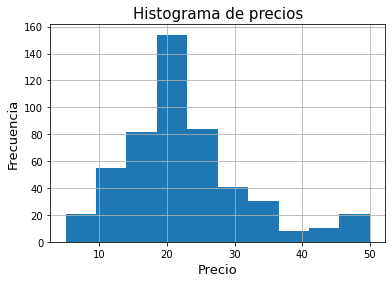

In [24]:
#Histogramas
boston_data.hist('PRICE')
plt.title("Histograma de precios", fontsize=15)
plt.xlabel("Precio",fontsize=13)
plt.ylabel("Frecuencia",fontsize=13)
plt.show()

### 6. Realice el diagrama de caja del precio de las casas.

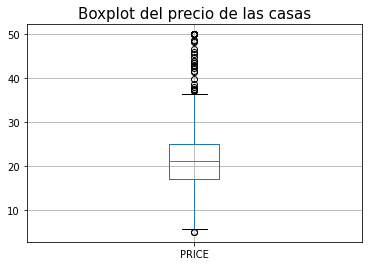

In [25]:
#Diagrama de caja
boston_data.boxplot('PRICE')
plt.title('Boxplot del precio de las casas', fontsize = 15)
plt.show()

## Análisis Multivariado

Tomando en cuenta que la variable objetivo es ```PRICE``` es importante identificar lo siguiente en el análisis multivariado:
* Las variables que están fuertemente correlacionadas con ```PRICE```.
* Las variables diferentes a ```PRICE``` que están fuertemente correlacionadas entre sí.

La primera nos permitiría identificar las variables que podrían ser más útiles en la predicción del precio, y la segunda, nos permitiría identificar aquellas variables que son redundantes.

### 7. Obtenga la matriz de correlación.

In [26]:
correlation_matrix = boston_data.corr(method = 'pearson')
correlation_matrix


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Tomando en cuenta que la matriz de correlación se ha guardado en la variable ```correlation_matrix```. Las siguientes celdas permitirán identificar las variables que estén más correlacionadas con el precio. No olvide que si el coeficiente de correlación de Pearson es próximo a 1 entonces las variables están altamente correlacionadas de forma positiva, pero si es próximo a -1 también están correlaciondas pero de forma inversa.

In [27]:
correlation_matrix["PRICE"].sort_values(ascending = False, key=lambda x: np.abs(x))

PRICE      1.000000
LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: PRICE, dtype: float64

El diagrama de dispersión puede ser útil para observar visualmente la relación entre dos variables. Además de permitir observar la relación, también puede servir para la identificación de valores anómalos. El siguiente diagrama de dispersión presenta la relación entre la variable ```CRIM``` y ```PRICE```.

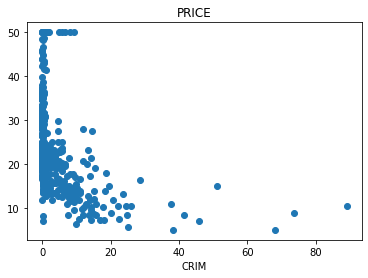

In [28]:
fig, ax = plt.subplots()

scatter = ax.scatter(boston_data["CRIM"], boston_data["PRICE"])
ax.set_xlabel('CRIM')
ax.set_title('PRICE')
plt.show()

### 8. Obtenga el diagrama de dispersión entre el precio ```PRICE``` y la variable que esté más correlacionada con él.

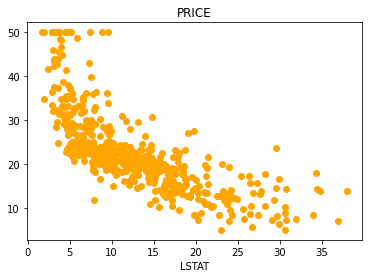

In [31]:
fig, ax = plt.subplots()

""" Se eligió la variable LSTAT por presentar una alta correlación inversa
    con la variable PRICE, dicha correlación se puede apreciar mejor de
    manera gráfica.
"""
scatter = ax.scatter(boston_data["LSTAT"], boston_data["PRICE"], color = 'orange')
ax.set_xlabel('LSTAT')
ax.set_title('PRICE')
plt.show()